<a href="https://colab.research.google.com/github/jeffkdu-edu/MachineLearning/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-02-09 02:43:17--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2023-02-09 02:43:17 (17.7 MB/s) - ‘diabetes.csv.1’ saved [23873/23873]



In [24]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [25]:
from pandas.core import describe
df.describe().T # review the data with describe. Transpose to get a better look

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [26]:
with open("diabetes.csv", "r") as f:
  data = f.readlines()
feats = data[0]
feats = feats.replace('\n', '')
feats = feats.split(",")

In [27]:
print(feats) 

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [28]:
# 'Outcome' is the label and not a feature - trim it!

In [29]:
feats = feats[0: (len(feats) - 1)]
dat = [] # instances
labs = [] #labels
for i in range(1, len(data)):
  line = data[i]
  line = line.replace('\n', '')
  csvline = line.split(",")
  labs = labs + [int(csvline[len(csvline)-1])]
  csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
  dat = dat + [csvline]

In [30]:
print(len(dat)) # number of instances

768


In [31]:
print(dat[15]) # just one instance with the 8 feature values

[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0]


In [32]:
# Now that the training data is ready we can build a decision tree. We can use 
# sklearn to help.

In [33]:
from sklearn import tree
#clf - decision tree classifier
clf = tree.DecisionTreeClassifier(max_leaf_nodes=3) # max 3 leaf nodes
clf = clf.fit(dat, labs)

In [34]:
# How well does the decision tree predict the data? About 77% correct
correct = 0
for i in range(len(dat)):
  if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
100.0 * correct / len(dat)

77.21354166666667

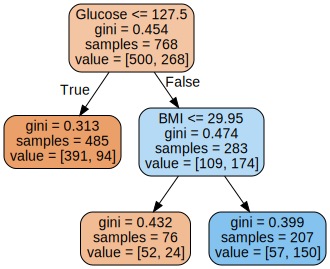

In [35]:
#The decision tree
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=feats, 
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# The root node has 768 samples. The value tells us that 500 of these have a 
#0 label(no diabetes) and 268 have a 1 label (diabetes within 5 years). It makes 
# sense to use glucose as the root node because a high level of glucose means
# a person is not breaking down glucose well. This can be a sign that thier
# insulin is not working correctly putting the person at risk for future 
# diabetes.